

1. encode text to binary value
2. load the rgb value of a cover image
3. convert image from rgb to hsi and extract the i plane
4. convert the i plane array to binary values array and input the encoded binary value into this function.
5. in this function, swap the lsb of iplane with encoded binary values
6. new function for converting the hsi with modified i value back to rgb and showing the image.
7. one function which will call the rgb_to_hsi function to get the i plane and extract its lsb values.
8. decode to see if values match
9. one function for extracting lsb and replacing it with both options as a switch case

h,s and i have to be stored in the main function where everything is called.  



In [ ]:
def encode(text):
    binary_text = ''.join(format(ord(char), '08b') for char in text)
    return binary_text

def decode(binary_text):
    text = ''.join(chr(int(binary_text[i:i+8], 2)) for i in range(0, len(binary_text), 8))
    return text

In [ ]:
text = "Top secret password"
binary_text = encode(text)
print("Encoded binary text:", binary_text)
decoded_text = decode(binary_text)
print("Decoded text:", decoded_text)

Encoded binary text: 01010100011011110111000000100000011100110110010101100011011100100110010101110100001000000111000001100001011100110111001101110111011011110111001001100100
Decoded text: Top secret password


In [ ]:
# LOAD THE IMAGE
import cv2
import numpy as np
# import ipdb
def load_image(image):
  image = cv2.imread(image+'.jpg', cv2.IMREAD_COLOR)

  if image is None:
      print("Failed to load image")
  else:
      height, width, channels = image.shape

      rgb_matrix = image.reshape((height * width, channels))
      return rgb_matrix

image_rgb = load_image("image")
np.shape(image_rgb)

(5038848, 3)

In [ ]:

def rgb_to_hsi(rgb_array):

    # Extract RGB channels
    r = rgb_array[..., 0] / 255.0
    g = rgb_array[..., 1] / 255.0
    b = rgb_array[..., 2] / 255.0

    # Calculate Intensity (I)
    i = (r + g + b) / 3.0

    # Calculate Saturation (S)
    min_rgb = np.min(rgb_array, axis=-1) / 255.0
    s = 1.0 - 3.0 * (min_rgb / (r + g + b + 1e-8))

    # Calculate Hue (H)
    h = np.arccos(((r - g) + (r - b)) / (2.0 * np.sqrt((r - g)**2 + (r - b) * (g - b) + 1e-8)))
    h = np.where(b <= g, h, 2.0 * np.pi - h)
    h = h / (2.0 * np.pi)

    # Create HSI array
    hsi_array = np.stack((h, s, i), axis=-1)

    return h,s,i
h,s,i = rgb_to_hsi(image_rgb)
h,s,i


(array([0.52821792, 0.52821792, 0.52821792, ..., 0.74387715, 0.74387715,
        0.74387715]),
 array([0.0928    , 0.0928    , 0.09324759, ..., 0.26829269, 0.23655915,
        0.26506025]),
 array([0.81699346, 0.81699346, 0.8130719 , ..., 0.32156863, 0.36470588,
        0.3254902 ]))

In [ ]:
def decimal_to_binary_array(decimal_array):
    binary_array = []
    for decimal_num in decimal_array:
        binary_num = np.binary_repr(np.float64(decimal_num).view(np.uint64))
        binary_array.append(binary_num)
    return binary_array

0.0

In [ ]:
i_binary = decimal_to_binary_array(i)
i_binary

In [ ]:
uint64_num = 4603068830900377197

float64_num = np.frombuffer(np.uint64(uint64_num).tobytes(), dtype=np.float64)[0]

print("Unsigned integer 64-bit:", uint64_num)
print("Float64 number:", float64_num)


Unsigned integer 64-bit: 4603068830900377197
Float64 number: 0.5433


In [ ]:
def encode_intensity(i, encoded_text, func):
    xx = []
    count= 0
    new_intensity = []
    if func == 'extract':
        for x in i:
          count+=1
          if(count<=(len(encoded_text))):
            xx.append(int(x) % 10)
        binary_num = ''.join([str(x) for x in xx])
        return binary_num


        return xx
    elif func == 'encode':
      for x in i:
        if count<len(encoded_text):
          binary_list = list(x)
          binary_list = [int(x) for x in binary_list]
          binary_list[-1] = int(encoded_text[count:count+1])
          binary_num = ''.join([str(x) for x in binary_list])
          new_intensity.append(binary_num)
          count+=1
        else:
          # ipdb.set_trace()
          new_intensity.append(x)
      return new_intensity

In [ ]:
# exracting the LSB of
my_list = encode_intensity(new_i,binary_text,"extract")
my_list

'01010100011011110111000000100000011100110110010101100011011100100110010101110100001000000111000001100001011100110111001101110111011011110111001001100100'

In [ ]:
new_i = encode_intensity(i_binary,binary_text,"encode")
new_i

['11111111101010001001001100111101111010001001001100111101111010',
 '11111111101010001001001100111101111010001001001100111101111011',
 '11111111101010000001001010111101011010000001001010111101011010',
 '11111111101010000001001010111101011010000001001010111101011011',
 '11111111101001111001001000111100111001111001001000111100111000',
 '11111111101001110001000110111100011001110001000110111100011001',
 '11111111101001111110011111100111111001111110011111100111111010',
 '11111111101001111110011111100111111001111110011111100111111010',
 '11111111101001110110011101100111011001110110011101100111011010',
 '11111111101010000110100001101000011010000110100001101000011011',
 '11111111101010001110100011101000111010001110100011101000111011',
 '11111111101010001110100011101000111010001110100011101000111010',
 '11111111101010010110100101101001011010010110100101101001011011',
 '11111111101010011110100111101001111010011110100111101001111011',
 '111111111010100110111111000101000110100110111111000101000110

In [ ]:
import colorsys

def hsi_to_rgb(h, s, i):
    """
    Convert HSI color value to RGB color value.

    Args:
        h (float): Hue value in the range [0, 360]
        s (float): Saturation value in the range [0, 1]
        i (float): Intensity value in the range [0, 1]

    Returns:
        tuple: Tuple of RGB color values (r, g, b) as floats in the range [0, 1]
    """
    # Convert hue to the range [0, 1]
    h = h / 360.0

    # Convert HSI to RGB using colorsys library
    r, g, b = colorsys.hsv_to_rgb(h, s, i)

    return r, g, b

In [ ]:
# Example HSI values
h = 180
s = 0.5
i = 0.8

# Convert HSI to RGB
r, g, b = hsi_to_rgb(h, s, i)

# Round RGB values to 2 decimal places
r = round(r, 2)
g = round(g, 2)
b = round(b, 2)

# Print RGB values
print(f"Red: {r}, Green: {g}, Blue: {b}")

Red: 0.4, Green: 0.8, Blue: 0.8


In [ ]:
def binary_to_decimal(binary):
    """
    Convert a binary value to its equivalent decimal value.
    :param binary: Binary value as a string.
    :return: Decimal value as an integer.
    """
    decimal = int(binary, 2)
    decimal = np.frombuffer(np.uint64(decimal).tobytes(), dtype=np.float64)[0]
    return decimal

decimal = binary_to_decimal(binary)

# print("Decimal value of binary", binary, "is:", decimal)

OverflowError: ignored

In [ ]:
def binary_to_decimal(binary_arr):
    """
    Convert a binary value to its equivalent decimal value.
    :param binary: Binary value as a string.
    :return: Decimal value as an integer.
    """
    result = []
    for i in binary_arr:
      decimal = int(i, 2)
      decimal = np.frombuffer(np.uint64(decimal).tobytes(), dtype=np.float64)[0]
      result.append(decimal)
    return result

decimal = binary_to_decimal(i_binary)

# print("Decimal value is:", decimal)

In [ ]:
decimal

[0.8169934640522877,
 0.8169934640522877,
 0.8130718954248367,
 0.8130718954248367,
 0.8091503267973855,
 0.8052287581699346,
 0.811764705882353,
 0.811764705882353,
 0.8078431372549021,
 0.815686274509804,
 0.819607843137255,
 0.819607843137255,
 0.823529411764706,
 0.8274509803921569,
 0.8261437908496733,
 0.8222222222222223,
 0.823529411764706,
 0.823529411764706,
 0.823529411764706,
 0.815686274509804,
 0.815686274509804,
 0.815686274509804,
 0.819607843137255,
 0.819607843137255,
 0.815686274509804,
 0.823529411764706,
 0.8274509803921569,
 0.823529411764706,
 0.815686274509804,
 0.811764705882353,
 0.815686274509804,
 0.815686274509804,
 0.815686274509804,
 0.811764705882353,
 0.811764705882353,
 0.815686274509804,
 0.819607843137255,
 0.815686274509804,
 0.811764705882353,
 0.8078431372549021,
 0.815686274509804,
 0.811764705882353,
 0.8169934640522877,
 0.8248366013071896,
 0.8248366013071896,
 0.8169934640522877,
 0.8209150326797386,
 0.8287581699346406,
 0.8209150326797386,
 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

image_path = 'image.jpg'
# rgb_matrix = np.array(Image.open(image_path))
rgb_matrix = np.array(Image.open(im))
plt.imshow(rgb_matrix)
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
!pip install pillow

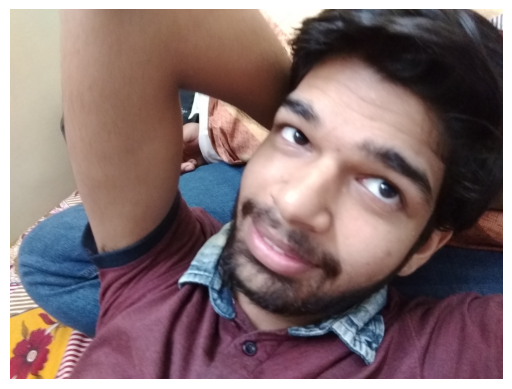

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the RGB matrix from an image file
image_path = 'image.jpg'  # Replace with your image file path
rgb_matrix = np.array(Image.open(image_path))

# Display the image using PIL
plt.imshow(rgb_matrix)
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
extract_lsb_from_i_plane()
 rgb_img = Image.new("RGB", (256, 256), (r, g, b))